In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
sns.set_style("darkgrid")

from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
l2_trials = pd.read_csv("/content/drive/MyDrive/AML project/modelli/modelli salvati/risultati_opt_l2.csv")
dropout_trials = pd.read_csv("/content/drive/MyDrive/AML project/modelli/modelli salvati/dropout.csv")
dropout_trials = dropout_trials.drop(index = 0)
dropout_trials = dropout_trials.reset_index()

In [3]:
def maximizer(data):

  best_data = []
  
  best_data.append(data[1]) #da rimettere a zero

  smaller = data[1] #da rimettere a zero

  
  for i in range(len(data)-1):
    
    if data[i+1] < smaller : 

      best_data.append(data[i+1])

      smaller = data[i+1]

    else:

      best_data.append(smaller)

  
  return best_data



l2_trials['best_value'] = maximizer(l2_trials['value'])
dropout_trials['best_value'] = maximizer(dropout_trials['value'])

In [ ]:
dropout_trials.head()

In [ ]:
l2_trials.head()

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot('number', 'best_value', data=l2_trials, linestyle='-', marker='o', label = "l2 regularization")
plt.plot('number', 'best_value', data=dropout_trials, linestyle='-', marker='o', label = "dropout")
plt.xlabel("# trial")
plt.ylabel("Best Loss (mse)")
plt.xlim(0, 50)
plt.legend()

In [ ]:
### plot loss train vs loss val

perf_no_opt_l1 = pd.read_csv(r"/content/drive/MyDrive/AML project/modelli/modelli salvati/perf_no_opt_l1.csv")
perf_opt_l1 = pd.read_csv(r"/content/drive/MyDrive/AML project/modelli/modelli salvati/perf_opt_l1.csv")

perf_no_opt_l2 = pd.read_csv(r"/content/drive/MyDrive/AML project/modelli/modelli salvati/perf_no_opt_l2.csv")
perf_opt_l2 = pd.read_csv(r"/content/drive/MyDrive/AML project/modelli/modelli salvati/perf_opt_l2.csv")

perf_no_opt_dropout = pd.read_csv(r"/content/drive/MyDrive/AML project/modelli/modelli salvati/perf_no_opt_dropout.csv")
perf_opt_dropout = pd.read_csv(r"/content/drive/MyDrive/AML project/modelli/modelli salvati/perf_opt_dropout.csv")

In [ ]:
model_l2_opt =keras.models.load_model("/content/drive/MyDrive/AML project/modelli/modelli salvati/model_opt_l2.h5")
model_l2_no_opt =keras.models.load_model("/content/drive/MyDrive/AML project/modelli/modelli salvati/model_no_opt_l2.h5")

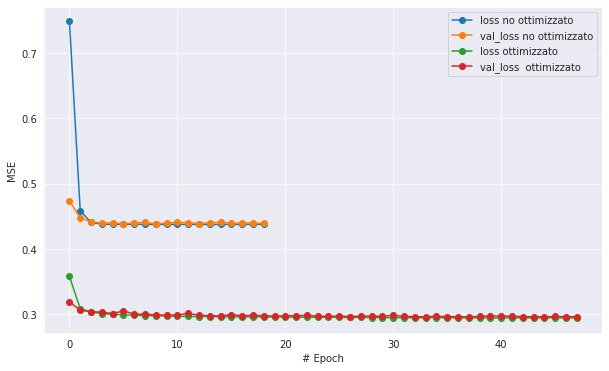

In [ ]:
plt.figure(figsize = (10, 6))

plt.plot('loss', data=perf_no_opt_l1, linestyle='-', marker='o', label = "loss no ottimizzato")
plt.plot('val_loss', data=perf_no_opt_l1, linestyle='-', marker='o', label = "val_loss no ottimizzato")
plt.plot('loss', data=perf_opt_l1, linestyle='-', marker='o', label = "loss ottimizzato")
plt.plot('val_loss', data=perf_opt_l1, linestyle='-', marker='o', label = "val_loss  ottimizzato")

plt.xlabel("# Epoch")
plt.ylabel("MSE")
plt.legend()

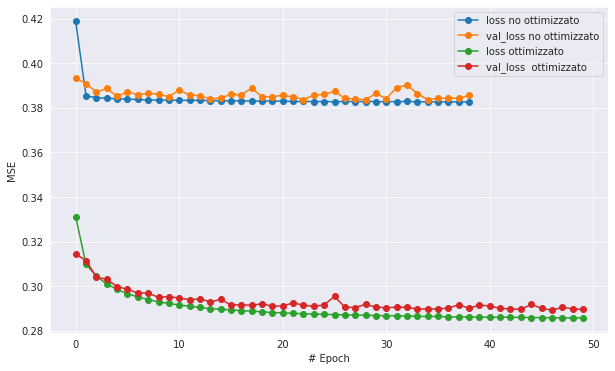

In [ ]:
plt.figure(figsize = (10, 6))

plt.plot('loss', data=perf_no_opt_l2, linestyle='-', marker='o', label = "loss no ottimizzato")
plt.plot('val_loss', data=perf_no_opt_l2, linestyle='-', marker='o', label = "val_loss no ottimizzato")
plt.plot('loss', data=perf_opt_l2, linestyle='-', marker='o', label = "loss ottimizzato")
plt.plot('val_loss', data=perf_opt_l2, linestyle='-', marker='o', label = "val_loss  ottimizzato")

plt.xlabel("# Epoch")
plt.ylabel("MSE")
plt.legend()

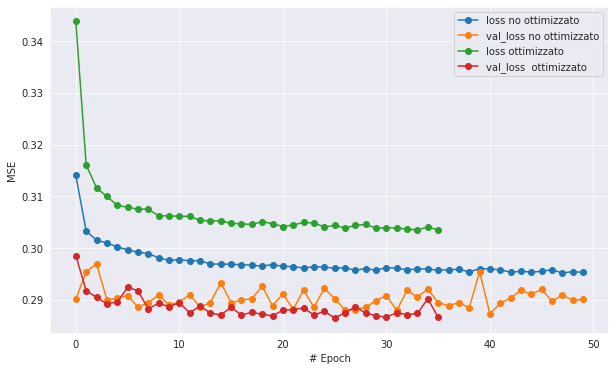

In [ ]:
plt.figure(figsize = (10, 6))

plt.plot('loss', data=perf_no_opt_dropout, linestyle='-', marker='o', label = "loss no ottimizzato")
plt.plot('val_loss', data=perf_no_opt_dropout, linestyle='-', marker='o', label = "val_loss no ottimizzato")
plt.plot('loss', data=perf_opt_dropout, linestyle='-', marker='o', label = "loss ottimizzato")
plt.plot('val_loss', data=perf_opt_dropout, linestyle='-', marker='o', label = "val_loss  ottimizzato")

plt.xlabel("# Epoch")
plt.ylabel("MSE")
plt.legend()

In [ ]:
model_l2_opt.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 160)               6720      
_________________________________________________________________
dense_5 (Dense)              (None, 112)               18032     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                7232      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 36,209
Trainable params: 36,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_l2_no_opt.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 224)               9408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               28800     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 46,529
Trainable params: 46,529
Non-trainable params: 0
_________________________________________________________________


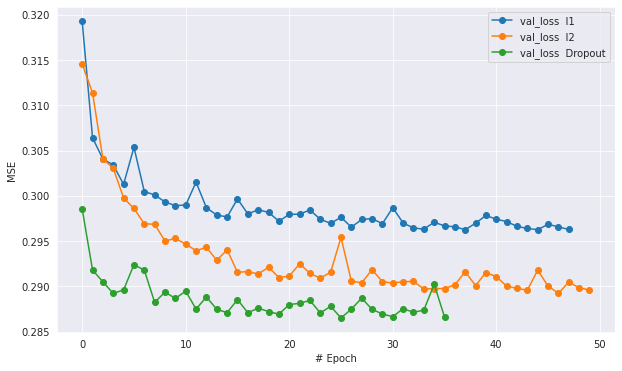

In [ ]:
plt.figure(figsize = (10, 6))


plt.plot('val_loss', data=perf_opt_l1, linestyle='-', marker='o', label = "val_loss  l1")
plt.plot('val_loss', data=perf_opt_l2, linestyle='-', marker='o', label = "val_loss  l2")
plt.plot('val_loss', data=perf_opt_dropout, linestyle='-', marker='o', label = "val_loss  Dropout")

plt.xlabel("# Epoch")
plt.ylabel("MSE")
plt.legend()

In [ ]:
plt.subplot(1, 2, 1)
plt.plot('loss', data=perf_no_opt_dropout, linestyle='-', marker='o', label = "loss no ottimizzato")
plt.plot('val_loss', data=perf_no_opt_dropout, linestyle='-', marker='o', label = "val_loss no ottimizzato")
plt.plot('loss', data=perf_opt_dropout, linestyle='-', marker='o', label = "loss ottimizzato")
plt.plot('val_loss', data=perf_opt_dropout, linestyle='-', marker='o', label = "val_loss  ottimizzato")
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()


NameError: ignored